In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


#Import model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Read dataset file kc house with github

In [ ]:
#url dataset
url = "https://raw.githubusercontent.com/latief13mm/regression-data-kc-house/refs/heads/main/kc_house_data.csv"

#baca dataset dari url
df_kc_house = pd.read_csv(url)

df_kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df_kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Check Missing Data

In [ ]:
df_kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_kc_house.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Karena 'id' adalah identitas tidak berpengaruh pada harga rumah jadi dapat dihapuskan, kemudian ada 'date' merupakan tanggan dan object jadi dapat dihapuskan juga.

In [ ]:
#menghapus colom "id" dan "date"
df_kc_house.drop(['id', 'date'], axis=1, inplace=True)

In [ ]:
df_kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
#cek jumlah duplicate data
print(df_kc_house.duplicated().value_counts())

False    21608
True         5
Name: count, dtype: int64


In [ ]:
df_kc_house.duplicated().sum()

5

In [ ]:
#hapus data duplicate
print("Count first data :", df_kc_house.shape)
df_kc_house.drop_duplicates(inplace=True)
print("Count final data :", df_kc_house.shape)

df_kc_house.duplicated().sum()

Count first data : (21613, 19)
Count final data : (21608, 19)


0

# Eplorasi Data (EDA)


Visual data untuk mencari outlier

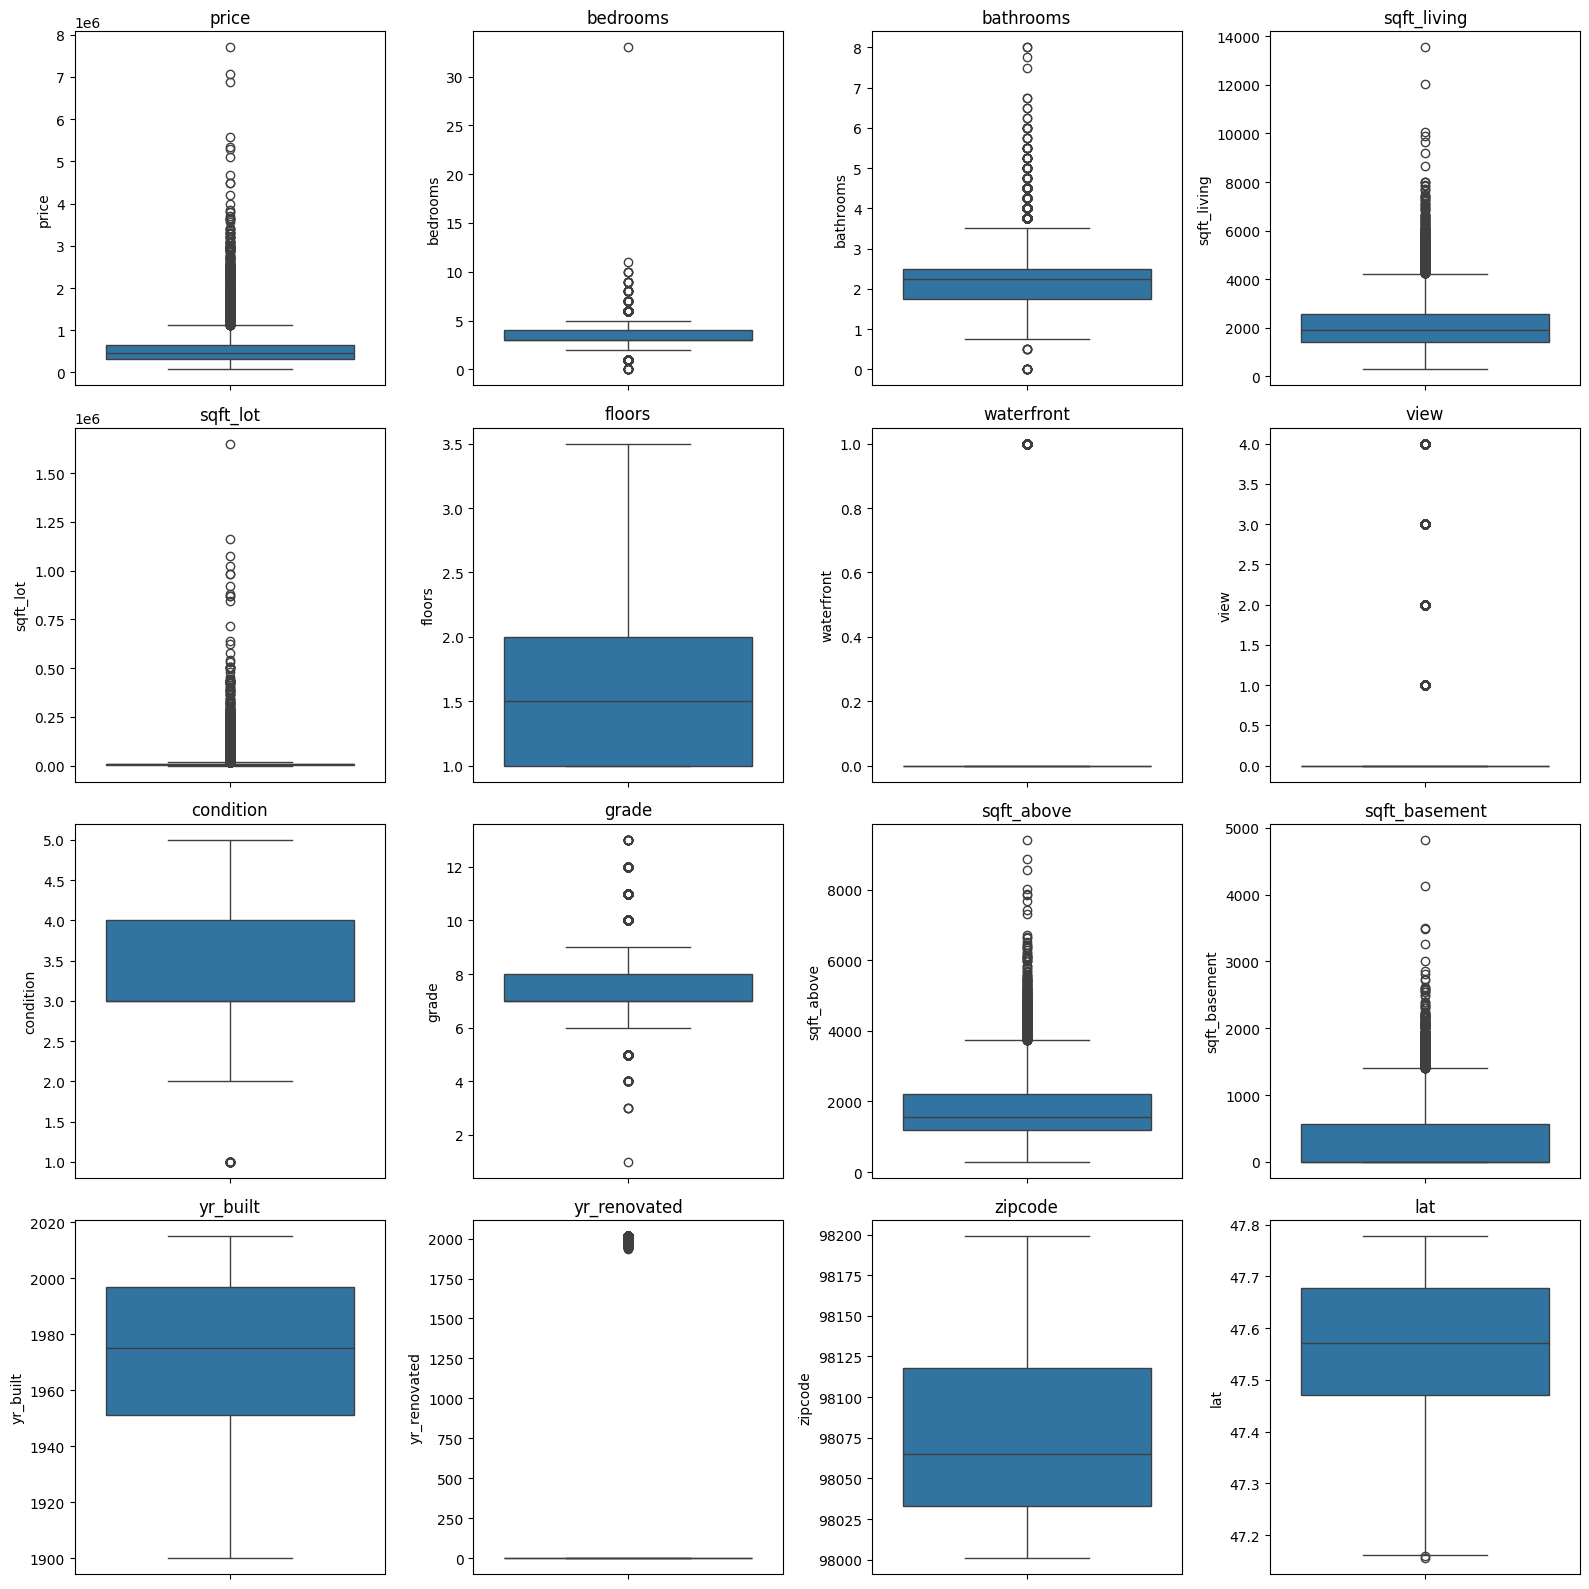

In [ ]:
# List of features to plot (you need to replace these with actual feature names from your DataFrame)
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat']

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in the grid
for ax, feature in zip(axes, features):
    sns.boxplot(data=df_kc_house[feature], ax=ax)
    ax.set_title(feature)

# Hide any unused subplots
for ax in axes[len(features):]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

Dari visualisasi diatas terlihat memiliki outlier, maka saya hapus untuk membentuk model regresi agar lebih baik

In [ ]:
# Daftar kolom yang ingin Anda cek dan hapus outlier
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade','waterfront','view', 'condition', 'sqft_above','sqft_basement', 'lat']

# Buat salinan dataset untuk mencegah perubahan pada dataset asli
df_clean = df_kc_house.copy()

# Loop melalui setiap kolom dan hapus outlier menggunakan IQR
for column in columns_to_check:
    # Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus baris dengan nilai di luar batas bawah dan atas
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Dataset yang telah dibersihkan dari outlier
print(df_clean.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

Cek data setelah dihapuskan outlier nya

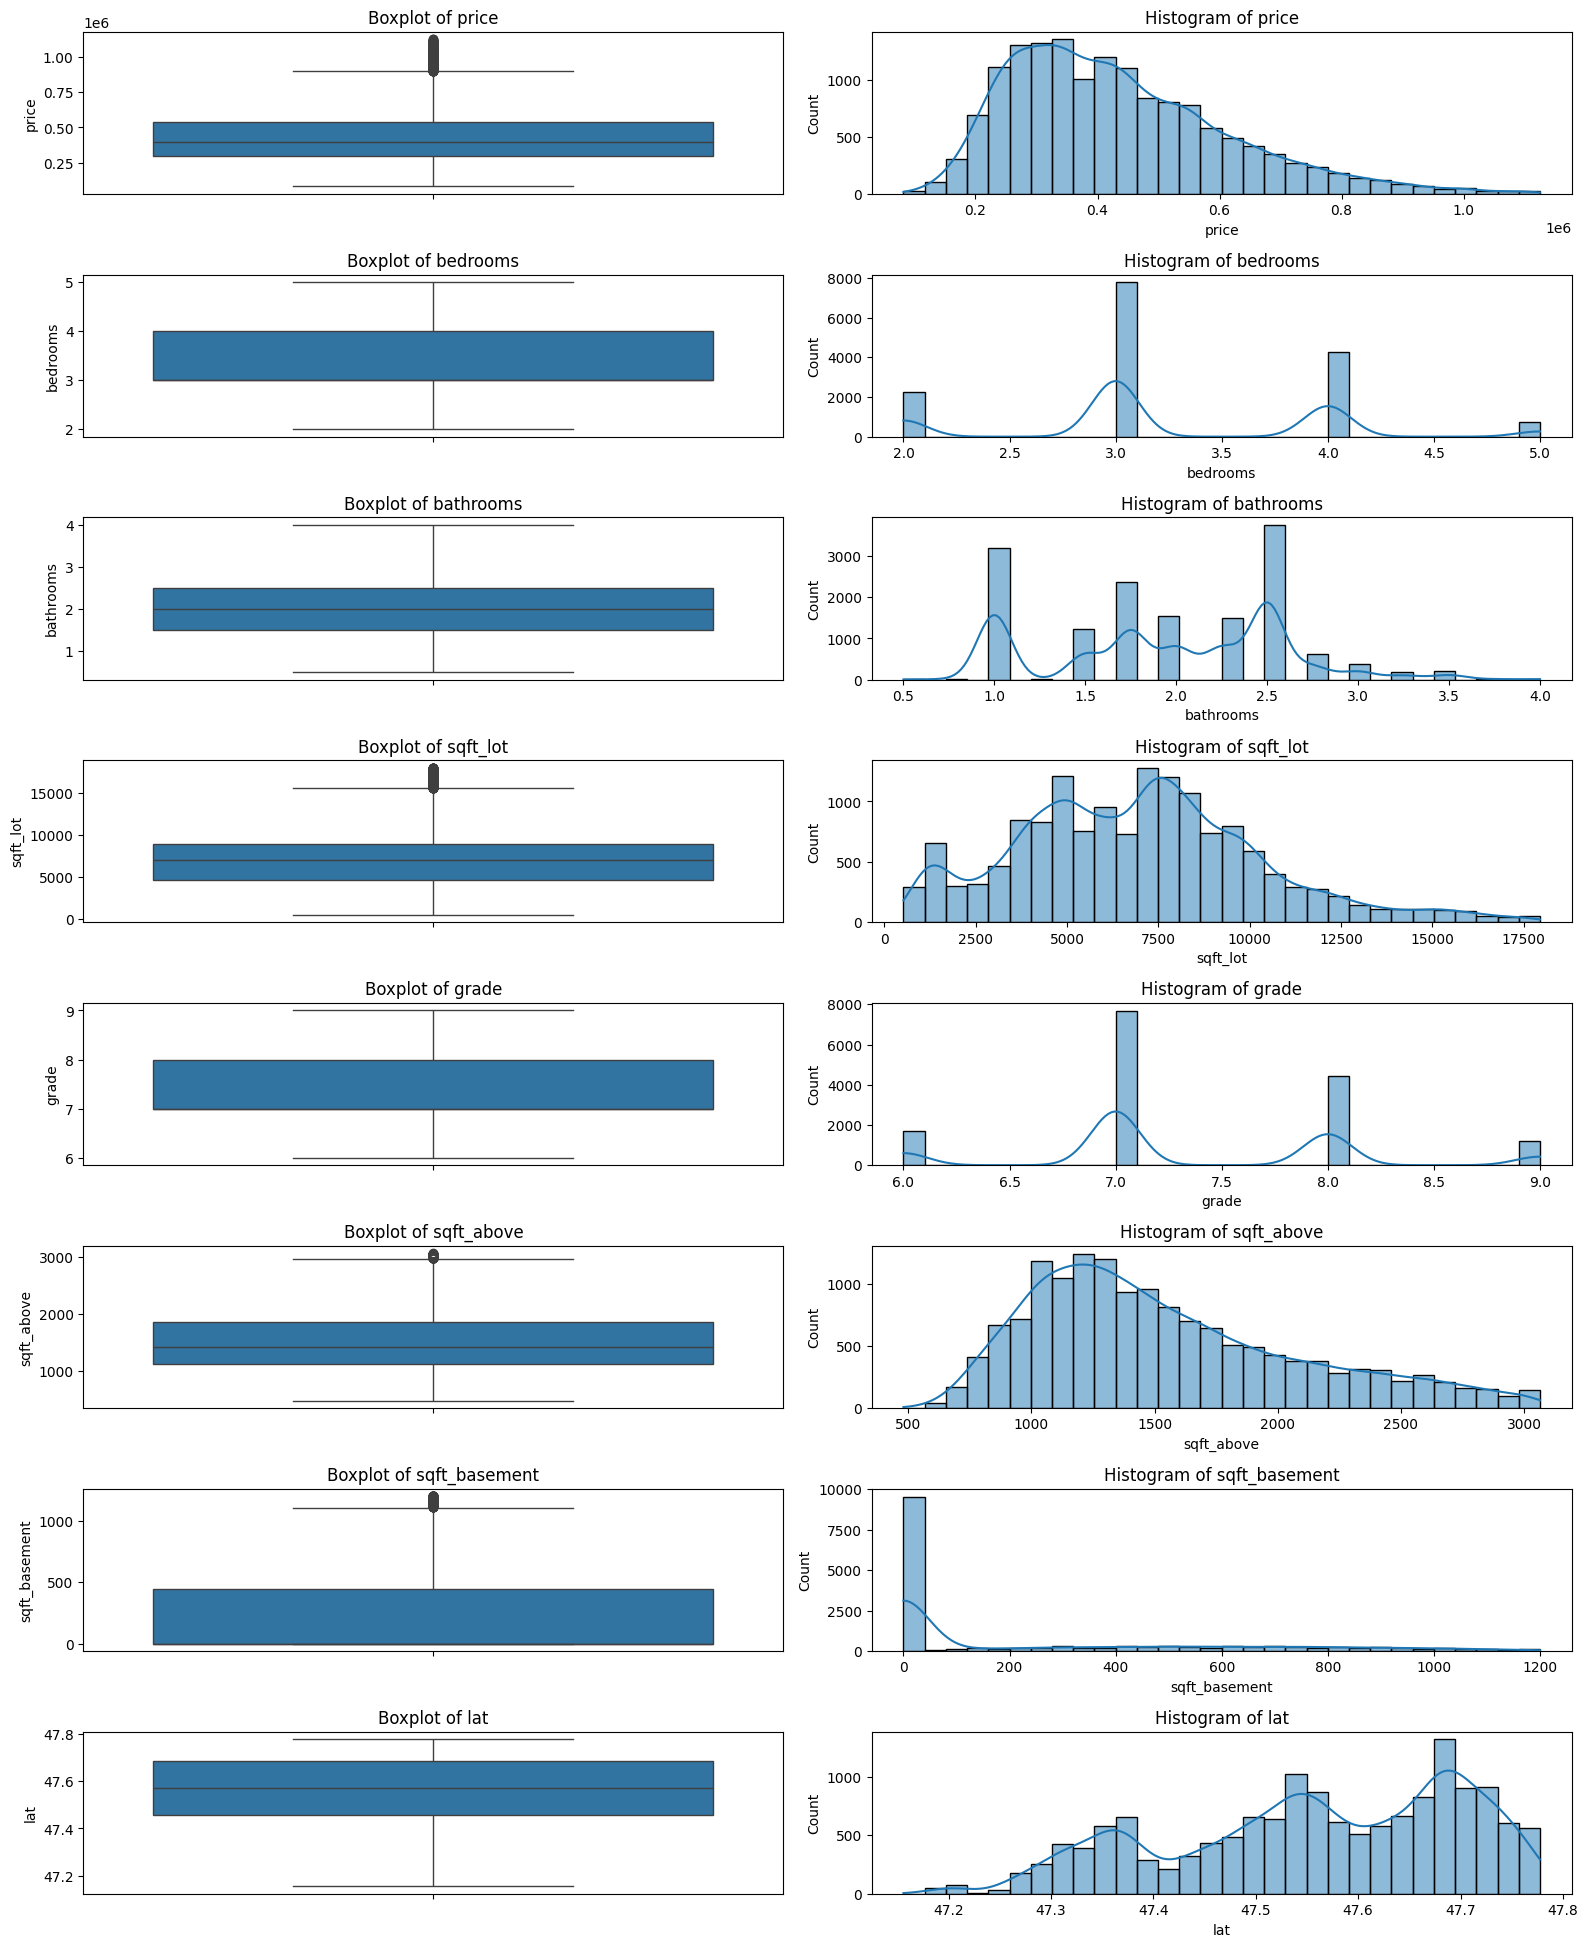

In [ ]:
# Daftar kolom yang ingin Anda visualisasikan
columns_to_visualize = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'lat']

# Mengatur ukuran gambar
plt.figure(figsize=(16, 24))

# Mengatur grid menjadi 5 baris dan 2 kolom
rows = 10
cols = 2

# Loop untuk membuat boxplot dan histogram untuk setiap kolom
for i, column in enumerate(columns_to_visualize):
    # Membuat subplot untuk boxplot
    plt.subplot(rows, cols, i * 2 + 1)
    sns.boxplot(data=df_clean[column])
    plt.title(f'Boxplot of {column}')

    # Membuat subplot untuk histogram
    plt.subplot(rows, cols, i * 2 + 2)
    sns.histplot(df_clean[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

Mencoba explorasi multivariate menggunakan heatmap

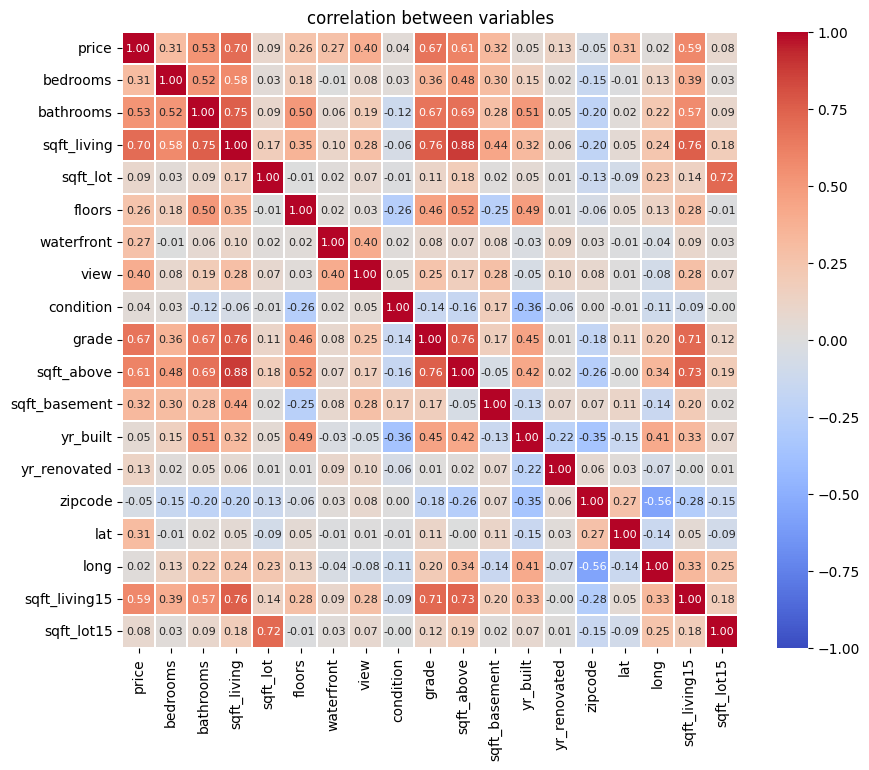

In [ ]:
# Fungsi Heatmap
corr = df_kc_house.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("correlation between variables")
plt.show()

Semakin nilai korelasi mendekati nilai 0 menandakan bahwa tidak ada korelasi antar variable independen dengan price, jadi bisa dihapuskan

In [ ]:
df_kc_house.drop(['sqft_lot', 'waterfront', 'condition', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'sqft_basement', 'floors', 'bedrooms'], axis=1, inplace=True)

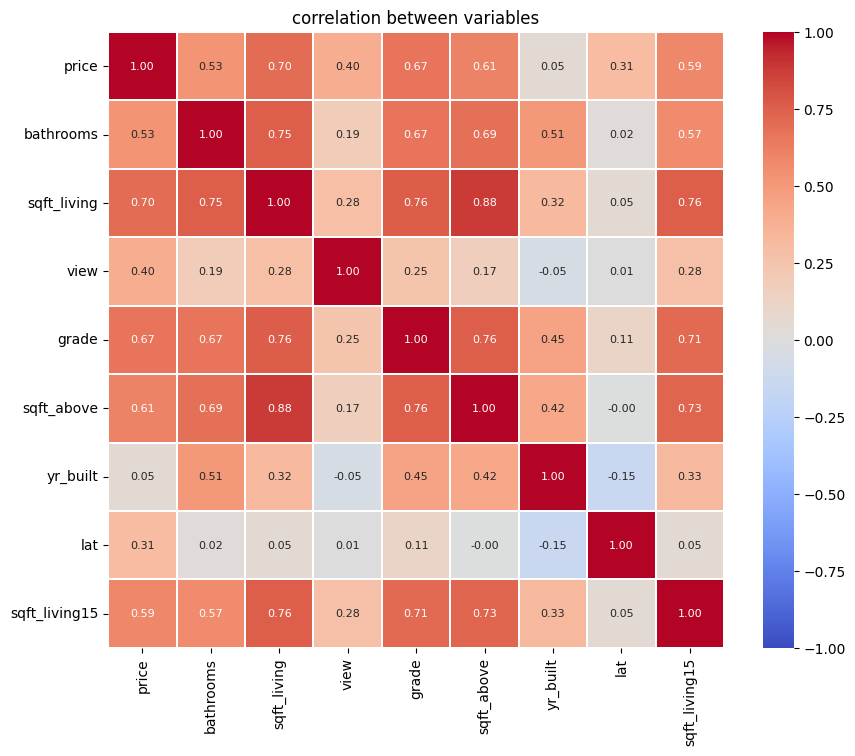

In [ ]:
# Heatmap korelasi setelah menghapus variable yang tidak berkorelasi
corr = df_kc_house.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("correlation between variables")
plt.show()

Mengecek Persebaran Data

<Figure size 1000x800 with 0 Axes>

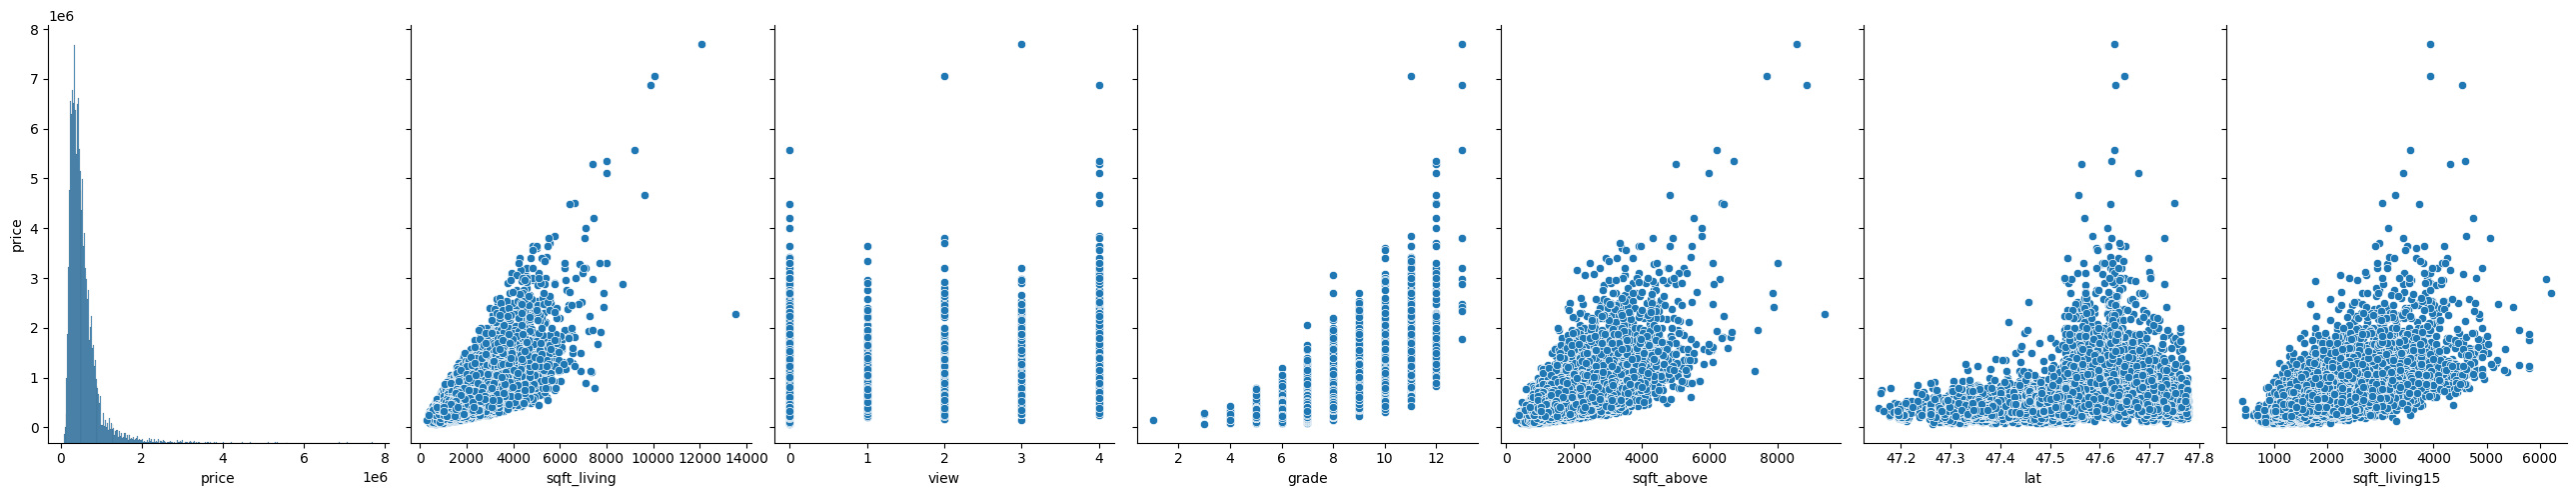

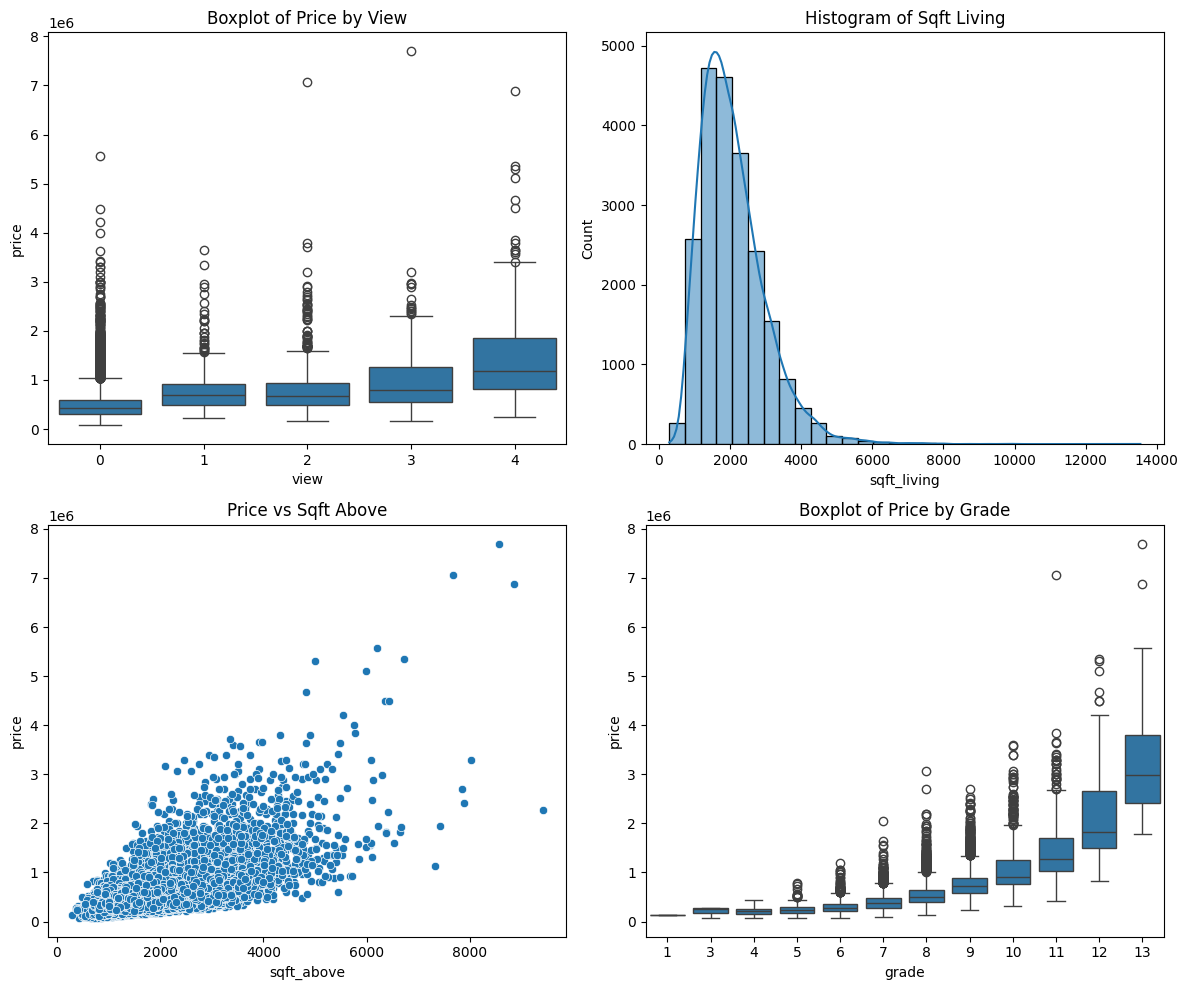

In [ ]:
# Mengatur ukuran figure untuk pairplot
plt.figure(figsize=(10, 8))

# Menggunakan pairplot untuk visualisasi hubungan antara variabel
sns.pairplot(data=df_kc_house,
             x_vars=['price', 'sqft_living', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15'],
             y_vars=['price'],
             height=5,
             aspect=0.75)

# Menampilkan pairplot
plt.show()

# Membuat figure dan axes untuk subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 baris, 2 kolom

# Visualisasi tambahan di subplot
# Contoh 1: Boxplot untuk 'price' berdasarkan 'view'
sns.boxplot(x='view', y='price', data=df_kc_house, ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Price by View')

# Contoh 2: Histogram untuk 'sqft_living'
sns.histplot(df_kc_house['sqft_living'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Histogram of Sqft Living')

# Contoh 3: Scatter plot untuk 'price' vs 'sqft_above'
sns.scatterplot(x='sqft_above', y='price', data=df_kc_house, ax=axs[1, 0])
axs[1, 0].set_title('Price vs Sqft Above')

# Contoh 4: Boxplot untuk 'grade' berdasarkan 'price'
sns.boxplot(x='grade', y='price', data=df_kc_house, ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Price by Grade')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

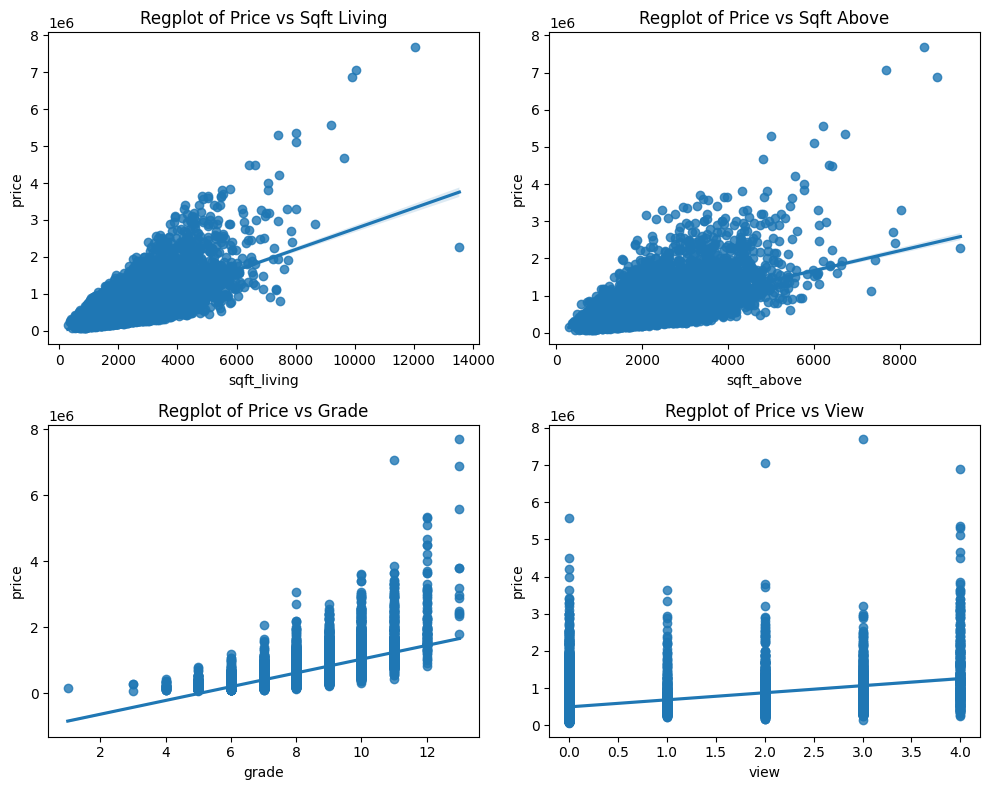

In [ ]:
# Mengatur ukuran figure untuk visualisasi
plt.figure(figsize=(10, 8))

# Menggunakan regplot untuk visualisasi hubungan antara 'price' dan beberapa variabel
# Contoh 1: Regplot untuk 'price' vs 'sqft_living'
plt.subplot(2, 2, 1)
sns.regplot(x='sqft_living', y='price', data=df_kc_house)
plt.title('Regplot of Price vs Sqft Living')

# Contoh 2: Regplot untuk 'price' vs 'sqft_above'
plt.subplot(2, 2, 2)
sns.regplot(x='sqft_above', y='price', data=df_kc_house)
plt.title('Regplot of Price vs Sqft Above')

# Contoh 3: Regplot untuk 'price' vs 'grade'
plt.subplot(2, 2, 3)
sns.regplot(x='grade', y='price', data=df_kc_house)
plt.title('Regplot of Price vs Grade')

# Contoh 4: Regplot untuk 'price' vs 'view'
plt.subplot(2, 2, 4)
sns.regplot(x='view', y='price', data=df_kc_house)
plt.title('Regplot of Price vs View')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

Data Analisis
1. Tahap pertama membagi variable dependen dan independen

In [ ]:
# variabel independent
X = df_kc_house.iloc[:, 1:].values
# Variabel Dependent
y = df_kc_house.iloc[:, :1].values

2. Membagi dataset menjadi data-training dan data-test

In [ ]:
# data train akan digunakan untuk memberi data pada machin learning
# data test untuk menilai hasil dari model machine learning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1385, random_state = 0)

3. Memasukkan nilai konstanta pada model dan mencetak hasil analisi regresi liniear

In [ ]:
# Memasukkan nilai konstanta pada model
X = sm.add_constant(X)

# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, X).fit()
print(model.summary())

# Melakukan prediksi pada data uji
X_test = sm.add_constant(X_test)  # Pastikan untuk menambahkan konstanta pada data uji juga
y_pred = model.predict(X_test)  # Menghasilkan prediksi

# Menghitung RMSE
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Menghitung skor model
print('Model Score: ', model.rsquared)  # Menggunakan model yang benar

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     5472.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:00:21   Log-Likelihood:            -2.9557e+05
No. Observations:               21608   AIC:                         5.912e+05
Df Residuals:                   21599   BIC:                         5.912e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.169e+07    5.5e+05    -39.462      0.0

Hasil Analisis Regresi
1. R-squared: Nilai 0.670 menunjukkan bahwa sekitar 67% variasi dalam y dapat dijelaskan oleh variabel independen dalam model. Ini menunjukkan model memiliki kekuatan prediksi yang cukup baik.
2. Adj. R-squared: Nilai 0.669, yang sedikit lebih rendah dari R-squared, menunjukkan bahwa model ini masih baik meskipun ada penalti untuk jumlah variabel yang digunakan.
3. P>|t| / p value: Nilai p untuk menguji signifikansi koefisien. Nilai p yang lebih kecil dari 0.05 (atau 0.01) menunjukkan bahwa koefisien tersebut signifikan secara statistik. Misalnya, semua variabel independen dalam output ini memiliki nilai p yang sangat kecil (0.000), menunjukkan bahwa semuanya signifikan
4. Root Mean Squared Error (RMSE): Nilai 200944.053604526 menunjukkan seberapa besar kesalahan prediksi model. RMSE yang lebih rendah menunjukkan model yang lebih baik
5. Model Score: Nilai 0.6696216866798329 menunjukkan seberapa baik model dalam memprediksi data.

Kesimpulan

- Model regresi ini menunjukkan bahwa variabel independen yang digunakan memiliki pengaruh signifikan terhadap variabel dependen y.

- R-squared yang cukup tinggi menunjukkan bahwa model ini dapat menjelaskan sebagian besar variasi dalam data.

- ada indikasi multikolinearitas yang perlu diperhatikan, dan Anda mungkin ingin melakukan analisis lebih lanjut untuk mengatasi masalah ini, seperti menghapus variabel yang berkorelasi tinggi atau menggunakan teknik regularisasi.

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
line = LinearRegression()
line.fit(X_train, y_train)

# Fungsi MAPE
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape

# Prediksi pada data-test
LR_Test_predict = line.predict(X_test)

# Menghitung nilai MAPE
LR_MAPE = MAPE(y_test, LR_Test_predict)
print("MAPE: ", LR_MAPE)

MAPE:  25.985912515911302


Pada perhitungan nilai MAPE, didapatkan nilai 25,98% yang mendekati batas nilai baik

# Visualisasi Hasil Analisis Regresi Linear

Karena menggunakan model regresi linear, visualisasi hasil analasis dataset penjualan rumah dilakukan dengan pairlot. kemudian, karena variable independen yang diteliti lebih dari 2, maka visualisasi tidak dapat dijadikan dalam satu plot, sehingga dibentuk pairplot mengenai hubungan variable dependen (price) dengan variable-variable independen. semakin tinggi korelasinya, maka garis regresi akan semakin curam.

Dari pairplot, dapat dilihat bahwa grade sangat mempengaruhi harga dari sebuah rumah. Selain itu, faktor lainnya seperti luas interior rumah, pemandangan rumah, luas rumah, letak lintang, dan luas rumah dari 15 tetangga terdekat juga cukup mempengaruhi harga sebuah rumah



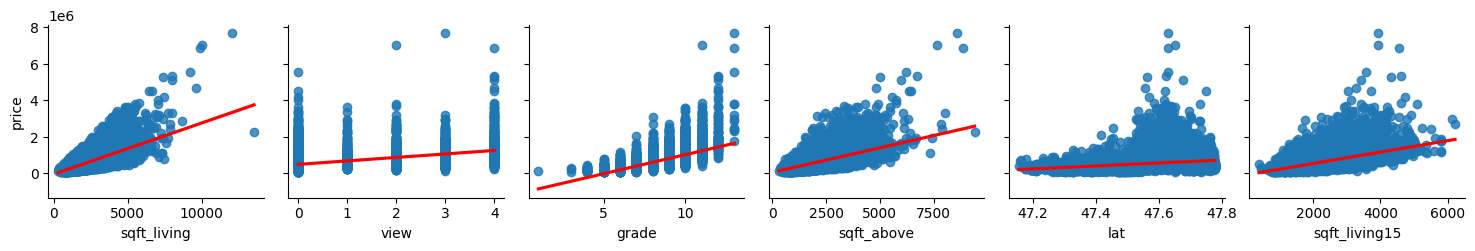

In [ ]:
sns.pairplot(df_kc_house, x_vars=['sqft_living', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15'], y_vars=['price'], kind='reg', plot_kws={'line_kws':{'color':'red'}})


Percobaan Uji Prediksi

Setelah mendapatkan model, dapat dilakukan uji prediksi harga rumah sesuai dengan faktor-faktor yang mempengaruhi: luas interior rumah, pemandangan, grade, luas rumah, letak lintang, dan luas rumah dari 15 tetangga terdekat.

In [ ]:
prediksi_input = [[1150, 0, 5, 1130, 47.5316, 2110,6, 20, 1120]]
print("Prediksi Harga Rumah: ", line.predict(prediksi_input))

Prediksi Harga Rumah:  [[88866576.554]]


In [ ]:
np.set_printoptions(precision=3)
print("Prediksi Harga Rumah: ", line.predict([[1150,0,9,1130,47.5316,2110,6,20,1120]]))

Prediksi Harga Rumah:  [[88867093.26]]
